In [238]:
# The code below 1) does a train/test split; 2) generates linear and quadratic models; 3) plots residuals for each model; 4) compares mean and root mean squared error for each model

# Task: Using BostonHousing.csv modify all of the cells below as needed to compute (and plot) the mean square error and root mean square error for basic linear regression and quadratic regression.  Plot RM againsts LSTAT

In [239]:
#Import packages
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [240]:
# Load Boston Housing Date
#Insert your code
df = pd.read_csv("BostonHousing.csv")
df = df[['RM', 'LSTAT']].dropna()

In [241]:
# Store relevant columns as variables
X = df[['RM']].values.reshape(-1, 1)
y = df[['LSTAT']].values.reshape(-1, 1)

In [242]:
# Split data into train and test sets
# These are pandas data frames
# Set the proportions of the training-validation-test split
trainingProportion = 0.70
validationProportion = 0.10
testProportion = 0.20

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=testProportion,
    train_size=trainingProportion,
    random_state=42
)

print(len(X_train), len(X_test), len(y_train), len(y_test))

340 98 340 98


In [243]:
# Create a linear model using the training set and predictions using the test set

#Declare an instance of the linear regression model
linModel = LinearRegression()

#fit the training values to discover b0 and b1
linModel.fit(X_train, y_train)
y_pred = linModel.predict(X_test)

(0.0, 40.0)

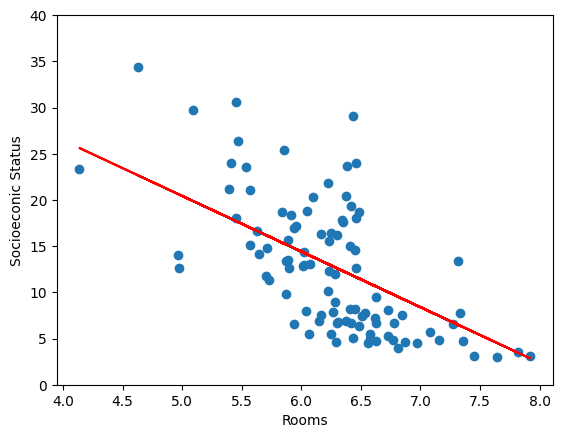

In [244]:
#Display linear model and scatter plot of the test set
#You'll have to make a change here, since BostonHousing has 506 lines. Generate 15 random indices in the range(len(BostonHousing)).
#Select the corresponding values from x_test,y_test, y_predict.  Then proceeed.

plt.scatter(X_test, y_test)
plt.xlabel("Rooms")
plt.ylabel("Socioeconic Status")

#plot the regression line
plt.plot(X_test, y_pred, color='red')

plt.ylim([0, 40])
#Plot the residulas.  See Zybooks 7.2.1, cell 4

In [245]:
# Display MSE
metrics.mean_squared_error(y_test, y_pred)

30.93948924825807

In [246]:
# Display RMSE
metrics.root_mean_squared_error(y_test, y_pred)

5.56232768256762

In [247]:
# Create a quadratic model using the training set and predictions using the test set
#convert data to numpy arrays
X_train = np.asarray(X_train) 
y_train = np.asarray(y_train)

'''
Creates cols for each power of x up to 2: x^0, x^1, x^2, now instead of 1 feature per row, the model sees 3
Ex: [2,3,4 becomes:
 [ [1,2,4],
    [1,3, 9],
    [1, 4, 16] }
'''
poly = PolynomialFeatures(degree=2).fit_transform(X_train.reshape(-1, 1))

#estimatestes the coefficients for each col, fitting a linear regression model but on expanded features
# y = b_0 + b_1x + b_2x^2
#minimizei∑(yi−(b0+b1xi+b2xi^2))^2
#used in the plot below: y =(poly_reg_model etc.   
poly_reg_model = LinearRegression().fit(poly, y_train)

#Does the same thing to the test set.  
poly_test = PolynomialFeatures(degree=2).fit_transform(X_test.reshape(-1, 1))

#bwi we're predicting on the test set
y_pred = poly_reg_model.predict(poly_test)

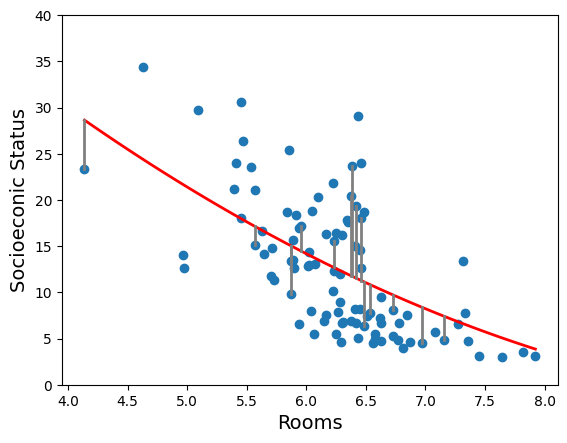

In [248]:
#Display quadratic model and scatter plot of the test set
#You'll have to make a change here, since BostonHousing has 506 lines. Generate 15 random indices in the range(len(BostonHousing)).
#Select the corresponding values from x_test,y_test, y_predict.  Then proceeed.

plt.scatter(X_test, y_test)
plt.xlabel("Rooms", fontsize=14)
plt.ylabel("Socioeconic Status", fontsize=14)
x = np.linspace(X_test.min(), X_test.max(), 100)
y = (
    poly_reg_model.coef_[0][2] * x**2
    + poly_reg_model.coef_[0][1] * x
    + poly_reg_model.intercept_[0]
)

plt.plot(x, y, color='red', linewidth=2)
plt.ylim([0, 40])
#blue dots are data points (X_test[i], y_test[i])
for i in range(15):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='grey', linewidth=2)

In [249]:
# Display MSE
metrics.mean_squared_error(y_test, y_pred)

30.581278299637507

In [250]:
# Display RMSE
#metrics.mean_squared_error(y_test, y_pred, squared=False)
metrics.root_mean_squared_error(y_test, y_pred)

5.530034204201408